# Homework Assignment 5 - Evan Callaghan and Bryce Dean

### 1. What does correlation measure? Be specific.

#### Correlation measures the extent to which data points are linearly related, that is, how well the data clusters around a line. 

### 2. Why is important to visualize the data using a scatter-plot before computing the correlation? 

#### Visualizing the data using a scatter-plot before computing the correlation is important because it gives us an indication about the relationship between the variables. The plot provides a sense of the extent to which the variables are correlated. If there is a clear positive or negative relationship, or no relationship at all, we will be able to see it before calculating the corresponding correlation coefficient. 

### 3. Matching the correlation coefficients with the scatter-plots.

#### a) r = 0.65; Scatterplot D
#### b) r = -0.02; Scatterplot C
#### c) r = 0.84; Scatterplot B
#### d) r = -0.72; Scatterplot A

### 4. What does Nadal do better on clay? Tennis player Rafael Nadal is considered by some to be the greatest clay-court player of all time, with 9 French Open titles among his 14 grand slam wins (as of June 2014). Nadal’s performance on clay to his performance on other surfaces during the period 2008-2012 is shown in the below table.

In [1]:
import numpy as np

## a) Computing the correlation coefficient

## r = (ad - bc) / sqrt((a + b)(c + d)(a + c)(b + d))
## a = 3658, b = 2715, c = 1660, d = 863

r = ((3658*863) - (2715*1660)) / (np.sqrt((3658 + 2715)*(1660 + 863)*(3658 + 1660)*(2715 + 863)))
print('Correlation:', r)


## ME = 2 * sqrt((1 - r^2) / n)
## n = 8896

ME = 2 * np.sqrt((1 - (np.power(r, 2))) / 8896)
print('Margin of Error:', ME)

## The correlation coefficient is -0.0772. This means that there is a slightly negative relationship between game result and clay or
## non-clay surface. Since, |r| > |ME|, we know that the correlation is statistically significant. 

Correlation: -0.07718335407390046
Margin of Error: 0.021141467761415497


In [2]:
## b)  Computing α, the cross-product ratio

## alpha = ad / bc
alpha = (3658 * 863) / (2715 * 1660)

print('Cross-Product Ratio:', alpha)

## Interpretation: The odds of Nadal winning a match/game is about 1.4 times greater if he is 
## on a clay surface compared to if he is not on a clay surface. 

Cross-Product Ratio: 0.7004490891743771


In [3]:
## c) Computing Q, the Yule’s Q

## yules = (alpha - 1) / (alpha + 1)

yules = (alpha - 1) / (alpha + 1)

print('Yules:', yules)

## The calculated Yule's Q follows that there is a negative relationship between Nadal's match/game result and whether
## or not the surface is clay.

Yules: -0.17615988195863277


In [4]:
## 5. a) Using pandas to read the csv file and create a data-frame called mlb

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None, 'display.max_columns', None)

mlb = pd.read_csv('Teams.csv')

mlb.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60.0,19.0,73.0,16.0,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,243,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60.0,22.0,69.0,21.0,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,229,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26.0,25.0,18.0,8.0,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,234,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33.0,9.0,16.0,4.0,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33.0,15.0,46.0,15.0,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,235,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [5]:
## b) Creating two new variables: RD (run differential as R - RA) and Wpct (winning percentage as W / (W + L))

mlb['RD'] = mlb['R'] - mlb['RA']
mlb['Wpct'] = mlb['W'] / (mlb['W'] + mlb['L'])

In [6]:
## c) We are interested in studying the relationship between RD and Wpct for recent seasons. Subsetting on seasons since 2001

mlb_subset = mlb[mlb['yearID'] >= 2001][['RD', 'Wpct']]

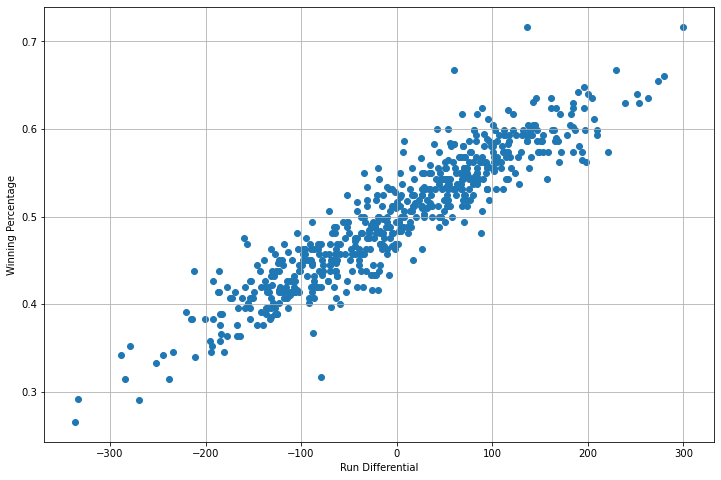

In [7]:
## d) Creating a scatter plot between RD and Wpct

plt.figure(figsize=(12,8))
plt.scatter('RD', 'Wpct', data = mlb_subset)
plt.xlabel('Run Differential')
plt.ylabel('Winning Percentage')
plt.grid()
plt.show()

## The scatter-plot shows a strong positive linear relationship between the Run Differential and Winning Percentage of a MLB team. That is,
## in general, as Run Differential increases, Winning Percentage also increases.

In [17]:
## e) Computing the correlation between RD and Wpct

correlation = mlb_subset.corr().iloc[0,1]
print('Correlation:', correlation)

## Calculating the margin error
n = mlb_subset.shape[0]
moe = 2 * np.sqrt((1 - correlation**2) / n)

print("Margin or Error:", moe)

## The correlation coefficient between Run Differential and Winning Percentage for MLB teams from 2001 to 2020 is
## 0.925. This indicates that there is a strong positive linear relationship between the variables. This is exaclty 
## what is displayed in the part (d) scatter-plot. Since |r| is greater than |moe|, we know that the linear relationship 
## is statistically significant.

Correlation: 0.9249672679702271
Margin or Error: 0.031030689452400083
